In [5]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [6]:
home = Path.cwd()
home

PosixPath('/Users/germanportes/Documents/general_assembly/projects/gpMidTerm')

In [22]:
filepath = Path.joinpath(home.parent, 'gpMidTerm', '2018-09-01-2019-09-08.csv')
filepath

PosixPath('/Users/germanportes/Documents/general_assembly/projects/gpMidTerm/2018-09-01-2019-09-08.csv')

In [10]:
acled = pd.read_csv(filepath)

In [11]:
acled.head(5)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,5727259,854,BFO1975,1975.0,31 August 2019,2019,1,Violence against civilians,Attack,Islamic State (Greater Sahara),...,Bosseye-Etage,14.5743,-0.3004,1,Whatsapp,National,"On August 31, suspected ISGS militants made an...",0,1567450156,BFA
1,5727284,120,CAO2490,2490.0,31 August 2019,2019,1,Violence against civilians,Abduction/forced disappearance,Ambazonian Separatists (Cameroon),...,Ekona,5.0288,9.4924,1,Mimi Mefo,National,31 August. Ambazonian separatists abducted a M...,0,1567450156,CMR
2,5727328,180,DRC15400,15400.0,31 August 2019,2019,1,Strategic developments,Agreement,Mayi Mayi Militia (Raia Mutomboki),...,Walikale,-1.4280,28.0730,1,7 Sur 7,National,"On 31 August, in Walikale, 17 Mayi Mayi Raya M...",0,1567450156,COD
3,5727329,180,DRC15401,15401.0,31 August 2019,2019,1,Protests,Peaceful protest,Protesters (Democratic Republic of Congo),...,Matadi,-5.8373,13.4500,1,Politico (DRC),National,"On 31 August, in Matadi, an unspecified number...",0,1567450156,COD
4,5727391,434,LBY8459,8459.0,31 August 2019,2019,1,Explosions/Remote violence,Shelling/artillery/missile attack,Military Forces of Libya (2014-) Haftar Faction,...,Mitiga Airport,32.8941,13.2760,1,Libya EN; Jamahiriya News Agency; Libya News A...,Other-National,"On August 31, suspected LNA-aligned forces she...",0,1567450156,LBY


In [ ]:
acled.columns

In [12]:
acled = acled[['event_date', 'event_type', 'sub_event_type', 'actor1', 'location', 'country','region', 'notes', 'fatalities']]
acled.dropna(how='any', inplace=True);
acled.shape

(140153, 9)

In [ ]:
acled.head()

In [13]:
acled['event_type'].value_counts()

Protests                      45662
Explosions/Remote violence    33164
Battles                       31356
Violence against civilians    12009
Riots                         11539
Strategic developments         6423
Name: event_type, dtype: int64

In [17]:
#acled.groupby(['actor1', 'event_type'])('country').count()
acled_country=acled[acled['sub_event_type'] == 'Attack'].groupby('country')['fatalities'].count().sort_values(ascending=False).head()
acled_country

country
India          1294
Philippines     953
Syria           672
Nigeria         567
Somalia         532
Name: fatalities, dtype: int64

Fatalities by country based on sub_event_categories; attacks:
country
India          1294
Philippines     953
Syria           672
Nigeria         567
Somalia         532
Name: fatalities, dtype: int64


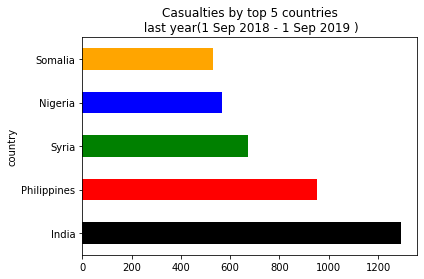

In [21]:
#acled_country.plot(kind='barh',stacked = True, colormap='summer')
acled_country.plot(kind='barh',stacked = True,color=['black', 'red', 'green', 'blue', 'orange'])
plt.title("Casualties by top 5 countries\n last year(1 Sep 2018 - 1 Sep 2019 )")
print ("Fatalities by country based on sub_event_categories; attacks:\n" +str(acled_country))
plt.savefig("midterm.png", dpi =300)

In [ ]:
acledGroup = acled.groupby('country')

for name,group in acledGroup:
    print (name)
    print (group)

In [ ]:
acled['actor1'].value_counts()

In [ ]:
acled['fatalities'].value_counts().sum()

In [ ]:
#acled['Month'] = acled['event_date'].dt.month
acled['event_date']=pd.to_datetime(acled['event_date'])

In [ ]:
acled['Month'] = acled['event_date'].dt.month
acled['year'] = acled['event_date'].dt.year
acled['day'] = acled['event_date'].dt.dayofweek

In [ ]:
acled.head()

In [ ]:
countries_fat=acled['fatalities'].value_counts('countries')

In [ ]:
countries_fat

In [ ]:
acled.plot(kind='scatter', x='Month', y='fatalities', c='year', colormap='jet')

In [ ]:
fat_event_type = acled.groupby('country')['fatalities'].mean().sort_values(ascending=False)

In [ ]:
fat_event_type.head()

In [ ]:
fat_event_type.plot(kind='bar')

In [ ]:
fat_event_type = acled.groupby('country')['fatalities'].count().sort_values(ascending=False).head(5)

In [ ]:
fat_event_type

In [ ]:
fat_event_type.plot(kind='bar');


In [ ]:
region_counts = acled['region'].value_counts()
region_counts

In [ ]:
region_counts.plot(kind = 'barh')

In [ ]:
region_fatalities = acled.groupby('region')['fatalities'].count().sort_values(ascending=False).head(5)

In [ ]:
region_fatalities.head()

In [ ]:
region_fatalities.plot(kind='pie',stacked = True, colormap='viridis')
plt.title("Casualties by top 5 regions\n last year(1 Sep 2018 - 1 Sep 2019 )")

In [ ]:
region_fatalities.plot(kind= 'bar')

In [ ]:
fig = px.line(acled, x='Month', y='fatalities')
fig.show()

In [ ]:
fig = go.Figure([go.Scatter(x=acled['day'], y=acled['fatalities'])])
fig.update_layout(title_text='Fatalities by day of the week',
                  xaxis_rangeslider_visible=True)
fig.show()